*********************************************
*********************************************
# Description of sample data
##  Created by Clarkson university Airlab team

*********************************************
*********************************************



### If you have any questions or concerns, please contact : sdhaniya@clarkson.edu (Suresh Dhaniyala)

In [26]:
# 2019/07/14 N.Kuerbanjinag
# import packages  
##############################################

%matplotlib inline
%config InlineBackend.figure_format='svg'


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
sns.set()
from datetime import datetime, timedelta
from scipy.signal import savgol_filter 
plt.style.use('seaborn-white')


# All data is send to Clarkson University's lab sever from each sensor
# [ "I am  the link that can send you to server "](http://128.153.15.208/phpmyadmin/)

## Username: cuairlab
## Password: cuairlab2019


###  All data will be save in a database called : "particle"
### Different sensors data go to different table

********************************************************

# Plantower sensor 

## In plantower sensor data, there will be 13 collums:
 Date, row_id,PM1.0,PM2.5,PM10,PN0.3,PN0.5,PN1.0,PN2.5,PN5.0,PN10,Temperature,Relative humidity

In [31]:
df1=pd.read_csv('/Users/nuera/Desktop/argon test4/argon1.csv')
df1.columns = ["Date","id",'pm1.0',"pm2.5","pm10","0.3um","0.5um","1.0um","2.5um","5.0um","10um","temp","humidity"]
df1['time'] = pd.to_datetime(df1['Date'])
df1.index=df1['time']
df1=df1['2019-07-14 16:54:01':'2019-07-14 21:41:00']


#### Units for PM1.0 : $ug/m^3$
#### Units for PM2.5 : $ug/m^3$
#### Units for PM10 : $ug/m^3$
#### Units for PN0.3 : $particles / 0.1L $
#### Units for PN0.5 : $particles / 0.1L $
#### Units for PN1.0 : $particles / 0.1L $
#### Units for PN2.5 : $particles / 0.1L $
#### Units for PN5.0 : $particles / 0.1L $
#### Units for PN10 : $particles / 0.1L $
#### Units for Temp: C degree
#### Units for RH : %

# Example plot of plantower PM2.5:

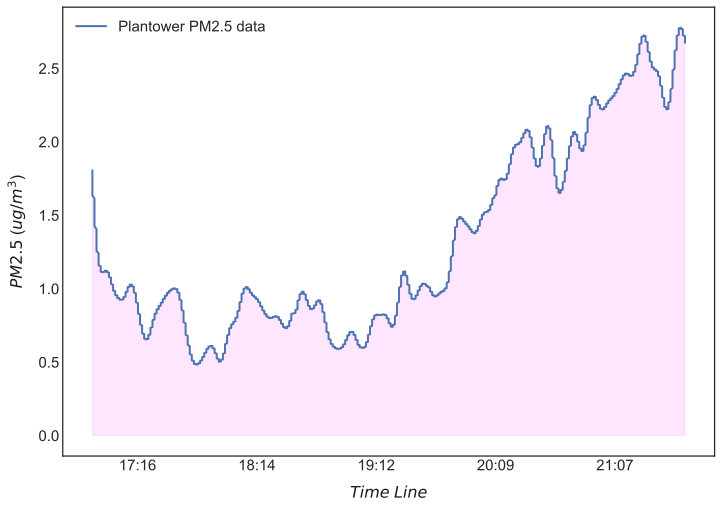

In [43]:
df1['pm2.5']=savgol_filter(df1['pm2.5'], 31, 1)

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax1.grid(False)

lns2=ax1.plot(df1['time'],df1['pm2.5'], linewidth=2,label='Plantower PM2.5 data')


lns = lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',fontsize=15,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


ax1.fill_between(df1['time'], df1['pm2.5'],color='magenta',alpha=.1)
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)